In [55]:
import matplotlib.pyplot as plt
from collections import Counter
from random import randint
import pandas as pd
import seaborn as sns

### Example 1: Coupon Collector

We are collectors and we want to collect all n kinds of coupons. Coupons are sold in packages which all look the same. Thus when we buy a coupon, we buy one of n kinds uniformly at random. This is known as the coupon collector problem. What is the expected number of coupons we need to buy to get all kinds?

In [90]:
def CouponCollector(n):
    coupons = [False] * n
    coupons_bought = 0
    coupons_useful = 0
    while coupons_useful < len(coupons):
        new_coupon = randint(0, len(coupons) - 1)
        coupons_bought += 1
        if not coupons[new_coupon]:
            coupons[new_coupon] = True
            coupons_useful += 1
    return coupons_bought

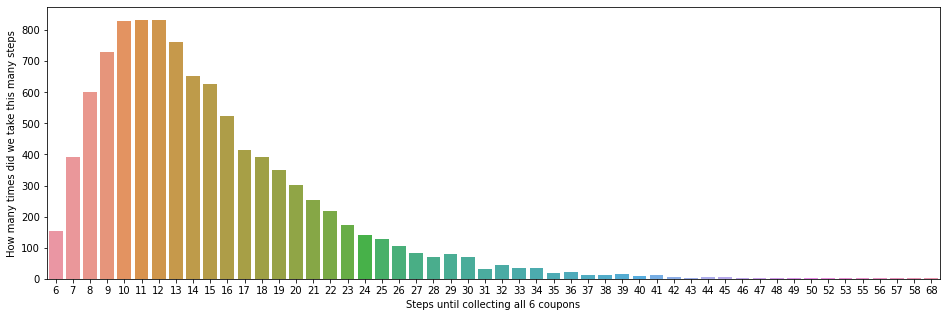

In [91]:
n_coupons = 6 # arbitrarily chosen
repeat = 10000 

counts = Counter(CouponCollector(n_coupons) for _ in range(repeat))
fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(x=list(counts.keys()), y=list(counts.values()),  ax=ax)
plt.xlabel("Steps until collecting all {} coupons".format(n_coupons))
plt.ylabel("How many times did we take this many steps")
plt.show()

### Example 2: Gambler's Ruin Chain

There are n states {y<sub>0</sub>, y<sub>1</sub>, y<sub>2</sub>, ..., y<sub>n-1</sub>}. You start from a state y<sub>i</sub> and you can go to the next state y<sub>i+1</sub> with probability p or to the previous state y<sub>i-1</sub> with probability 1-p. You win when you reach the last state y<sub>n-1</sub> and lose when you reached the first state y<sub>0</sub>. Suppose that you start from the state y<sub>s</sub> and p=0.5. What are the probabilities of reaching each state after k steps?

In [88]:
def GamblersRuinChain(start, first, last, k_steps):
    current = start
    for _ in range(k_steps):
        if current == first or current == last:
            current = current
        else:
            step = np.random.choice([-1, 1], p = [0.5, 0.5])
            current = current + step
    return current

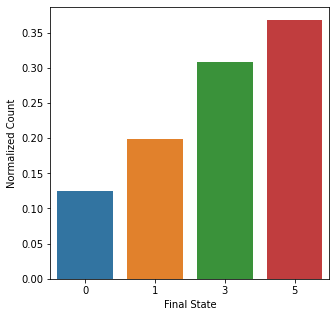

In [89]:
start, first, last, k_steps = 3, 0, 5, 4 # arbitrarily chosen
repeat = 10000

state_list = []
for i in range(repeat):
    state_list.append(GamblersRuinChain(start, first, last, k_steps))
    
counts = Counter(state_list)
norm_counts = {key: value / repeat for key, value in counts.items()}
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=list(norm_counts.keys()), y=list(norm_counts.values()), ax=ax)
plt.xlabel("Final State")
plt.ylabel("Normalized Count")
plt.show()

In [104]:
T = [[1, 0.5, 0, 0, 0, 0],
     [0.5, 0, 0.5, 0 , 0, 0],
     [0, 0.5, 0, 0.5, 0, 0],
     [0, 0, 0.5, 0, 0.5, 0],
     [0, 0, 0, 0.5, 0, 0.5],
     [0, 0, 0, 0, 0, 1]]

### Example 3: Markov Disk

An IDLE system stays IDLE with probability 0.95, goes to READ with probability 0.04, or goes to WRITE with probability 0.01. From READ, the next state is READ with probability 0.9, otherwise the system is equally likely to go to IDLE OR WRITE. Similarly, from WRITE, the next state is WRITE with probability 0.9, otherwise the system is equally likely to go to IDLE OR READ. Write a Python function markovdisk(n) to calculate the n-step transition matrix. Calculate the 10-step transition matrix P(10).

In [110]:
def markovdisk(n):
    P = np.array([[0.95, 0.04, 0.01], [0.05, 0.90, 0.05], [0.05, 0.05, 0.90]]) # transition matrix
    M = np.linalg.matrix_power(P, n)
    return M

P10 = markovdisk(10)
print(P10)

[[0.67433922 0.22575728 0.0999035 ]
 [0.32566078 0.45299249 0.22134673]
 [0.32566078 0.25611808 0.41822114]]


### Example 4: Router

In each time slot, a router can either store an arriving data packet in its buffer or forward a stored packet (and remove that packet from its buffer). In each time slot, a new packet arrives with probability p, independent of arrivals in all other slots. This packet is stored as long as the router is storing fewer than c packets. If c packets are already buffered, then the new packet is discarded by the router. If no new packet arrives and n > 0 packets are buffered by the router, then the router will forward one buffered packet. That packet is then removed from the buffer. Let X<sub>n</sub> denote the number of buffered packets at time n. Sketch the Markov chain for X<sub>n</sub> and find the stationary probabilities.

Simulate the router buffer for p = 0.48, buffer capacity c = 30 packets, and x<sub>0</sub> = 20 packets initially buffered. Perform simulation runs for 40 and 400 time steps.

In [152]:
def router_buffer(p, c, x0, n):
    # Define the transition probability matrix
    P = np.zeros((c+1, c+1))
    for i in range(c):
        P[i, i+1] = p
        P[i+1, i] = 1 - p
    P[c, c] = 1 - p
    
    # Find the stationary probabilities
    w, v = np.linalg.eig(P.T)
    j_stationary = np.argmin(np.abs(w - 1.0))
    pi = v[:, j_stationary].real
    pi = pi / np.sum(pi)
    
    # Simulate the router buffer
    x = np.zeros(n+1)
    x[0] = x0
    for i in range(n):
        if np.random.rand() < p and x[i] < c:
            x[i+1] = x[i] + 1
        elif x[i] > 0:
            x[i+1] = x[i] - 1
        else:
            x[i+1] = x[i]
    return x, pi

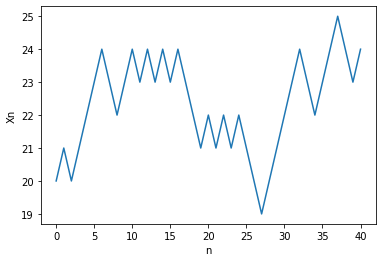

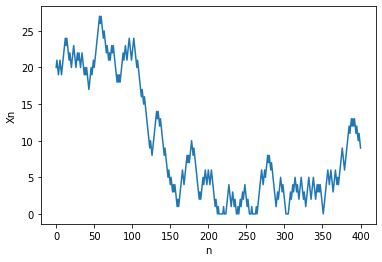

In [153]:
x, pi = router_buffer(p=0.48, c=30, x0=20, n=40)
plt.plot(range(len(x)), x)
plt.xlabel('n')
plt.ylabel('Xn')
plt.show()

x, pi = router_buffer(p=0.48, c=30, x0=20, n=400)
plt.plot(range(len(x)), x)
plt.xlabel('n')
plt.ylabel('Xn')
plt.show()

### Example 5: Air Conditioner

In the summer, an air conditioner is in one of three states: (0) off, (1) low, or (2) high. While off, transitions to low occur after an exponential time with expected time 3 minutes. While in the low state, transitions to off or high are equally likely and transitions out of the low state occur at rate 0.5 per minute. When the system is in the high state, it makes a transition to the low state with probability 2/3 or to the off state with probability 1/3. The time spent in the high state is an exponential (1/2) random variable. Model this air conditioning system using a continuous-time Markov chain.

Assuming the air conditioner is off at time t = 0, calculate the state probabilities at time t = 3.3 minutes.

In [150]:
from scipy.linalg import expm

def cmcprob(Q, p0, t):
    # Q has zero diagonal rates
    # initial state probabilities p0
    K = Q.shape[0] - 1  # max no. state
    R = Q - np.diag(np.sum(Q, axis=1))
    pv = np.transpose(np.matmul(p0[:, np.newaxis].T, expm(R * t)))
    return pv

[0.50241774 0.37442886 0.1231534 ]


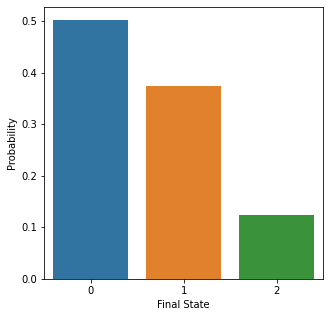

In [155]:
# Define the transition rate matrix Q
Q = np.array([
    [0, 1/3, 0],
    [1/4, 0, 1/4],
    [1/6, 1/3, 0]
])

# Define the initial state probability vector
p0 = np.array([1, 0, 0])

probs = cmcprob(Q, p0, 3.3)

print(probs.flatten())

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=[0,1,2], y=probs.flatten(), ax=ax)
plt.xlabel("Final State")
plt.ylabel("Probability")
plt.show()